In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
# print("mean:")
# print(df.mean())

# print('\nmedian:')
# print(df.median())

# print("\nStd deviation:")
# print(df.std())

# print(df.head(1))
# for col in df.columns:
#     print(df[col].dtypes)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# convert female to 1 and male to 0
rowLen = df.shape[0]
idx = df.columns.get_loc("Sex")

for i in range(0, rowLen):
    if(df.iloc[i, idx] == 'female'):
        df.iloc[i,idx] = 1
    if(df.iloc[i, idx] == 'male'):
        df.iloc[i, idx] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# convert Embarked into 0,1, and 2
df.Embarked.unique()
emb = { 'S': 1, 'C': 2, 'Q': 3}

nullIdx = df.Embarked[df.Embarked.isnull()]
nullIdx
rowLen = df.shape[0]
idx = df.columns.get_loc("Embarked")

for i in range(rowLen):
    if(i in nullIdx):
        df.iloc[i, idx] = 0
    else:
        df.iloc[i, idx] = emb[df.iloc[i, idx]]

In [9]:
df['Embarked'] = df['Embarked'].astype('float')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [10]:
for col in df.columns:
    print(col,"\t",  df[col].dtype)

PassengerId 	 int64
Survived 	 int64
Pclass 	 int64
Name 	 object
Sex 	 object
Age 	 float64
SibSp 	 int64
Parch 	 int64
Ticket 	 object
Fare 	 float64
Cabin 	 object
Embarked 	 float64


In [11]:
dataframe = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis = 1)
dataframe['Sex'] = dataframe['Sex'].astype('float')

In [12]:
target = dataframe['Survived']
data = dataframe.iloc[:, 1:]
data.shape

(891, 5)

In [13]:
data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0.0,22.0,1,0
1,1,1.0,38.0,1,0
2,3,1.0,26.0,0,0
3,1,1.0,35.0,1,0
4,3,0.0,35.0,0,0


In [14]:
# data.describe()

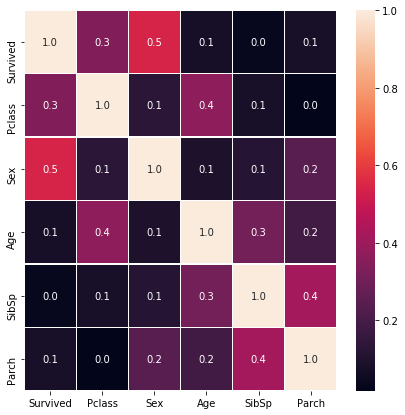

In [15]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(abs(dataframe.corr()), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
abs(data.corr())

,Pclass,Sex,Age,SibSp,Parch
Pclass,1.000000,0.131900,0.369226,0.083081,0.018443
Sex,0.131900,1.000000,0.093254,0.114631,0.245489
Age,0.369226,0.093254,1.000000,0.308247,0.189119
SibSp,0.083081,0.114631,0.308247,1.000000,0.414838
Parch,0.018443,0.245489,0.189119,0.414838,1.000000


In [17]:
dataframe.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000


In [18]:
# feature selection/extraction

# Method 1: manual exclusion
# to_be_excluded = ['SibSp', 'Parch', 'Embarked', 'Cabin', 'Fare']
# data = data.drop(to_be_excluded, axis = 1)
# data.head()

In [19]:
data.shape

(891, 5)

In [20]:
data.isnull().any()

Pclass    False
Sex       False
Age        True
SibSp     False
Parch     False
dtype: bool

In [21]:
data.Age.mean()

29.69911764705882

In [22]:
idx = data.columns.get_loc("Age")
rowLen = data.shape[0]
nullIdx = data.Age[data.Age.isnull()]
avg = data.Age.mean()

for i in range(rowLen):
    if(i in nullIdx):
        data.iloc[i, idx] = avg

In [23]:
data.isnull().any()

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
dtype: bool

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

/home/shreya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
def randomforest(splitRatio, data, target):
    """
    This function first splits the dataset in splitRatio, applies random forest and 
    returns mean accuracy of the model 
    """
    itr = 6
    accuracy = np.zeros(itr)
    for i in range(itr):
        x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = splitRatio, random_state = 42)

        rf = RandomForestClassifier(random_state=42)
        rf = rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        accuracy[i] = accuracy_score(y_test, y_pred)

    return accuracy.mean()

In [26]:
# 1. Random Forest
accuracy = randomforest(0.3, data, target)
accuracy

0.7985074626865671

0.7873134328358208

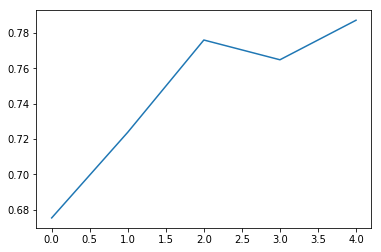

In [27]:
accuracy = np.zeros(data.shape[1])
for n_comp in range(1, data.shape[1] + 1):
    pca = PCA(n_components= n_comp)

    principalComp = pca.fit_transform(data)
    new_data = pd.DataFrame(data = principalComp)

    new_df = pd.concat([new_data, target], axis = 1)
    new_df.corr()

    accuracy[n_comp - 1] = randomforest(0.3, new_data, target)

plt.plot(range(data.shape[1]), accuracy)
max(accuracy)

As is evident, pca gives the same or worse results as random forest, which was bound to happen since correlation between attributes wasn't very much.

In [28]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeRegressor as DT

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [30]:
dt = DT(random_state=42)
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("y_pred before transformation: ", y_pred[:10])

# tranforming y_pred
for i in range(len(y_pred)):
    if(y_pred[i] < 0.5):
        y_pred[i] = 0
    else:
        y_pred[i] = 1

print("\ny_pred after tranformation: ", y_pred[:10])
accuracy = accuracy_score(y_test, y_pred)
accuracy

y_pred before transformation:  [0.         0.         0.         1.         0.         0.
 0.66666667 0.2        1.         1.        ]

y_pred after tranformation:  [0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]


0.7238805970149254

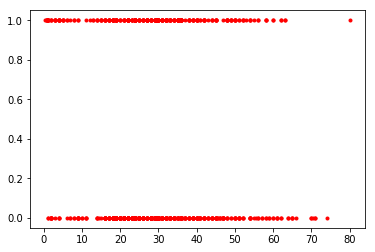

In [31]:
plt.plot(data.Age, target, 'r.')

In [32]:
data.head()
# df.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0.0,22.0,1,0
1,1,1.0,38.0,1,0
2,3,1.0,26.0,0,0
3,1,1.0,35.0,1,0
4,3,0.0,35.0,0,0


In [33]:
# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression as LR

In [34]:
# 3.1 Simple Logistic Regression
lr = LR(random_state=42)
lr = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = (accuracy_score(y_pred, y_test))
accuracy

0.8097014925373134

0.8283582089552238

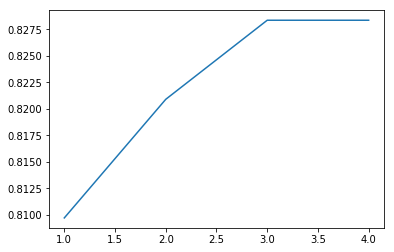

In [35]:
# 3.2 intercept scaling
accuracy = []
for i in range(1, 5):
    lr = LR(random_state=42, intercept_scaling= i)
    lr = lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accuracy.append(accuracy_score(y_pred, y_test))

plt.plot(range(1, 5), accuracy)
max(accuracy)

Maximum accuracy for intercept scaling = 3 (= 82.8%)

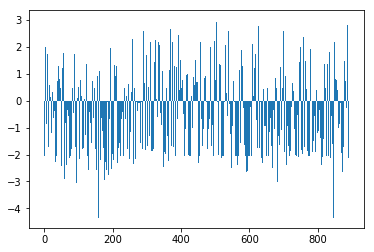

In [36]:
decFn = lr.decision_function(data)
fig = plt.bar(range(0, data.shape[0]), decFn, width = 1)

In [37]:
# dir(LR)

In [38]:
data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0.0,22.0,1,0
1,1,1.0,38.0,1,0
2,3,1.0,26.0,0,0
3,1,1.0,35.0,1,0
4,3,0.0,35.0,0,0


In [39]:
# 4. Linear Support Vector
from sklearn.svm import LinearSVC

0.832089552238806

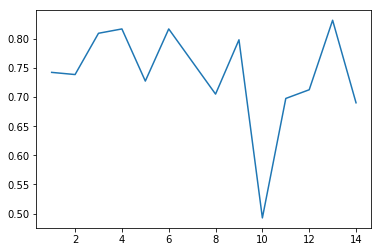

In [40]:
accuracy = []
for i in range(1, 15):
    svc = LinearSVC(random_state=42, intercept_scaling=i, tol = 1e-5)
    svc = svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    y_pred[:10]

    accuracy.append(accuracy_score(y_pred, y_test))

plt.plot(range(1, 15), accuracy)
accuracy[12]

In [41]:
# 5. KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

0.7649253731343284

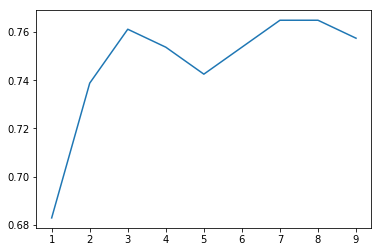

In [42]:
accuracy = []
en = 10
for i in range(1, en):
    knn = KNN(n_neighbors= i)
    knn = knn.fit(x_train, y_train)
    knn.get_params()
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(range(1,en), accuracy)
max(accuracy)

Maximum accuracy achieved at n_neighbors = 7 (= 76.5%)

In [43]:
# dir(knn)
